# Tarea 4

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
figura1 = Image.open('bloque.png','r')
TablaA1 = Image.open('AISI304.png','r')
figura2_5 = Image.open('Figura2_5.png','r')
figura1.thumbnail(size=(250,250))
TablaA1.thumbnail(size=(1000,1000))
figura2_5.thumbnail(size=(500,500))


#### Supongamos que tenemos un bloque de acero inoxidable AISI 304 como se muestra en la figura 1

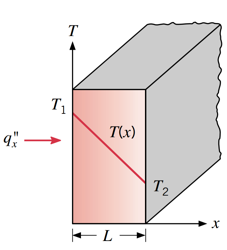

In [5]:
figura1

#### Las paredes planas en $x=0$ y $x=L$ se mantienen a $T1= 600 K$ y $T2= 400 K$ respectivamente. 

#### a) Examine el comportamiento de este material observado experimentalmente de la conductividad térmica como función de la temperatura, $k(T)$ a partir de la Figura 2.5 y los valores listados en el Apéndice A-Tabla A1. 

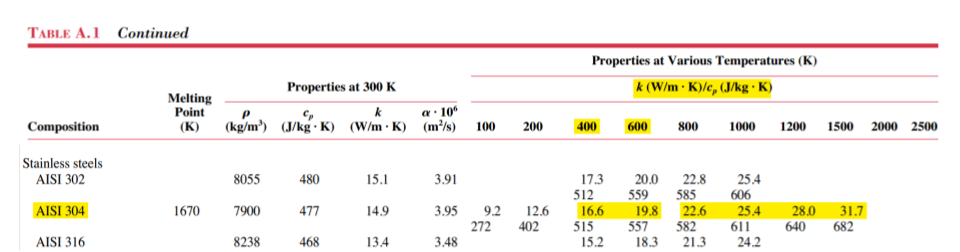

In [6]:
TablaA1

#### Aproxime $k(T)$ por una función lineal de la forma 

#### $$ k(T) = k_0 + k_1 T $$ 

#### Esto es, calcule los valores $k_0$ y $k_1$.


##### Solucion:

Una manera de encontrar $k_0$ y $k_1$ es usando la ecuación de la recta cuando conocemos dos puntos
$$k(T) = \left( \frac{k(T_2)-k(T_1)}{T_2-T_1} \right) \left(T-T_2 \right) + k(T_2) $$

Sustituimos $T_1, T_2, k(T_1), k(T_2)$ en la ecuación anterior

$$ k(T)=  \left( 0.016 \frac{W}{m K^2} T + 10.2 \frac{W}{mK} \right). $$
Otra manera de encontrar $k_0$ y $k_1$ es graficando los valores de las conductividades térmicas $k$ para los valores de las temperaturas $T$ que se muestran en la Tabla A.1

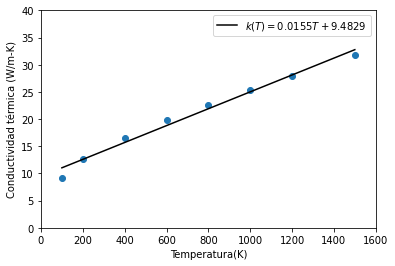

In [7]:
#creamos un archivo con los valores de la Tabla A.1 para AISI 304
data = {'T': [100,200,400,600,800,1000,1200,1500], 'k': [9.2, 12.6, 16.6,19.8,22.6,25.4,28.0,31.7]}  
dat = pd.DataFrame(data) 
#graficamos T(k) y deberiamos obtener una figura similar a la figura 2.5
plt.plot(dat['T'],dat['k'],'o')
k1,k0 = np.polyfit(dat['T'],dat['k'] , 1)
plt.plot(dat['T'],k1*dat['T']+k0,color='black',label="$k(T)={}T+{}$".format(k1.round(4),k0.round(4)))
plt.ylabel("Conductividad térmica (W/m-K)")
plt.xlabel("Temperatura(K)")
plt.legend()
plt.xlim(0,1600)
plt.ylim(0,40)
plt.show()

In [9]:
"Los valores son k1={} W/mK y k0={} w/mK".format(k1.round(5),k0.round(5))

'Los valores son k1=0.01552 W/mK y k0=9.48289 w/mK'

#### b) Considere que la conductividad térmica es constante e igual al promedio de la conductividad entre los valores entre T1= 600 K y T2= 400 K. Esto es

$$k = \frac{k(T=600 K)+ k(T=400 K) }{2} = 18.2 \frac{W}{mK} $$
#### Obtenga el campo de temperaturas $T(x)$, $0 < x < L$ y el flujo de calor por unidad de área $q_x^"(x)$. Sugerencia: Leer la sección 3.1.1.

##### Solución:

La ecuación de calor es 

$$\frac{d}{dx} \left(k \frac{dT}{dx} \right) = 0,$$

cuando la conductividad térmica no depende $k$ de la distancia $x$, la ecuación anterior es

$$\frac{d^2 T}{dx^2}=0.$$

La solución de esta ecuación es

$$T(x)=C_1x+C_2.$$

Para obtener la solución de las constantes $C_1$ y $C_2$ evaluamos la condición de frontera en $x=0$

$$T(x=0)=600 K, \qquad C_2=600 K.$$

Después evaluamos la condición de frontera en $x=L$
$$T(x=L)=400 K, \qquad C_1= \frac{400 K- 600 K}{L}.$$

Sustitumos $C_1$ y $C_2$ en la ecuación del perfil de temperatura y obtenemos

$$T(x) = 600 K - \frac{200 K}{L} x.$$

El flujo de calor por unidad de área es

$$q_x^"= \frac{k}{L} \frac{dT}{dx}= 3,640 \frac{W}{m^2}.$$ 

#### c) Considere que la conductividad térmica es una función lineal de la temperatura $k(T)=k_0 + k_1T$ y encuentre la distribución de temperaturas $T(x)$ y el flujo de calor $q_x$.